In [1]:
import os
from math import e
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
os.getcwd()

'C:\\Users\\Aj\\Documents\\Columbia - Applied Machine Learning\\Week 2\\Assignment'

In [2]:
data = pd.read_csv('C:\\Users\\Aj\\Documents\\Columbia - Applied Machine Learning\\Week 2\\Data\\train.csv')

In [3]:
df = pd.DataFrame(data.isna().sum())
df.loc[data.isna().sum().idxmax()]

0    1453
Name: PoolQC, dtype: int64

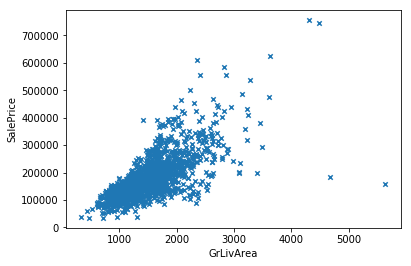

In [4]:
data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

In [5]:
ans1 = pd.DataFrame(data[["Street", "Alley"]])


In [6]:
def standardize(vec):
    '''
    Takes in a list of numbers
    Outputs normalized numbers using mean and standard deviation
    '''
    
    vec = np.array(vec)
    
    mu = np.mean(vec)
    std = np.std(vec, ddof = 0)
    
    normal = (vec - mu)/ std
    
    normal1 = [(x-mu)/std for x in vec]
    
    return normal, normal1

In [7]:
def preprocess_for_regularization1(data, y_column_name, x_column_names):
    
    '''
    data = our entire dataframe
    y_column_name = our target variable/ response variable
    x_column_names = subset of data we wish to normalize
    
    '''
    
    if data[y_column_name].dtype != 'object':
                
        predict = np.round(data[y_column_name] - np.mean(data[y_column_name]),1)#demeaning the target
        
    else:
        
        return 'invalid target type'
    
    explanatory = data[x_column_names] # subset of data we care about
    
    explanatory = explanatory[~explanatory.isin(['NaN', 'NaT']).any(axis=1)]
    
    for name in explanatory.columns:
        if explanatory[name].dtype != 'object' or explanatory[name] != y_column_name:
            explanatory[name] = (explanatory[name] - np.mean(explanatory[name]))/ np.std(explanatory[name], ddof = 1)
    final = pd.concat([explanatory, predict], axis = 1)
    
    return final

In [8]:
def preprocess_for_regularization(data, y_column_name, x_column_names):
    
    toRetCol = x_column_names + [y_column_name]
    
    toRet = data[toRetCol].copy()
    
    y_mean = np.mean(data[y_column_name])
    toRet[y_column_name] = data[y_column_name].apply(lambda x: x-y_mean)
    
    for column in x_column_names:
        mean = np.mean(data[column])
        std = np.std(data[column])
        
        toRet[column] = data[column].apply(lambda x: (x-mean)/std)
    return toRet

In [9]:
def ridge_regression_weights(input_x, output_y, lambda_param):

    output_y = output_y.reshape((len(np.array(output_y)), 1))
    
    if input_x.shape[1]>input_x.shape[0]:
        
        input_x = np.array(input_x.T)
        
    if output_y.shape[1]>output_y.shape[0]:
        
        output_y = output_y.T   
    
    ones = np.ones(len(input_x)).reshape((len(np.array(input_x)), 1))
    x = np.hstack((ones,input_x))
    y = np.array(output_y)
    lambda_identity = lambda_param*np.identity(len(x.T))
    theInverse = np.linalg.inv(np.matmul(x.T,x)+lambda_identity)
    w = np.matmul(np.matmul(theInverse, x.T), y)
    
    weights = np.array(w)
    return weights


In [31]:
training_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
lambda_param = 10
        
rrw = ridge_regression_weights(training_x, training_y, lambda_param)
rrw

array([[-576.67947107],
       [  77.45913349],
       [  31.50189177]])

In [11]:
def ridge_regression_weights1(input_x, output_y, lambda_param):
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
        
    ones = np.ones((len(output_y),1),dtype = int)
    
    augmented_x = np.concatenate((ones,input_x), axis = 1)
    
    lambda_matrix = lambda_param*np.identity(min(augmented_x.shape))
    
    inv = np.linalg.inv(lambda_matrix + np.matmul(np.transpose(augmented_x), augmented_x))
    
    left_multiplier = np.matmul(inv, np.transpose(augmented_x))
    
    weights = np.matmul(left_multiplier, output_y)
    
    return weights
    

In [30]:
rrw2 = ridge_regression_weights1(training_x, training_y, lambda_param)
rrw2

array([-576.67947107,   77.45913349,   31.50189177])

In [12]:
training_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
lambda_param = 10
        
rrw = ridge_regression_weights1(training_x, training_y, lambda_param)
rrw.shape

(3,)

In [13]:
### Example of hiden function below:

### `hidden` takes a single number as a parameter (int or float) and returns a list of 1000 numbers
### the input must be between 0 and 50 exclusive
### all of the lambdas we will try out
def hidden(hp):
    if (hp<=0) or (hp >= 50):
        print("input out of bounds")
    
    nums = np.logspace(0,5,num = 1000)
    vals = nums** 43.123985172351235134687934
    
    user_vals = nums** hp
    
    return vals-user_vals

In [21]:
def minimize(passed_func):
    """
    Find the numeric value that makes the mean of the
    output array returned from 'passed_func' as close to 0 as possible.
    
    Positional Argument:
        passed_func -- a function that takes a single number (between 0 and 50 exclusive)
            as input, and returns a list of 1000 floats.
        
    Example:
        passed_func = hidden
        min_hidden = minimize(passed_func)
        print(round(min_hidden,4))
        #--> 43.1204 (answers will vary slightly, must be close to 43.123985172351)
    
    """
    test_vals = list(np.linspace(.1,49.9,1000))
    
    rets_vals = [abs(np.mean(passed_func(x))) for x in test_vals]
    
    min_mean = min(rets_vals)
    
    return test_vals[rets_vals.index(min_mean)]

In [22]:
minimize(hidden)

43.120420420420416

In [27]:
def lambda_search_func(lambda_param):
    
    # Define X and y
    # with preprocessing
    df = preprocess_for_regularization(data.head(50),'SalePrice', ['GrLivArea','YearBuilt'])
    
    y_true = df['SalePrice'].values
    X = df[['GrLivArea','YearBuilt']].values
    
    # Calculate Weights then use for predictions
    weights = ridge_regression_weights1(X, y_true, lambda_param )
    y_pred = weights[0] + np.matmul(X,weights[1:])
    # Calculate Residuals
    resid = y_true - y_pred
    
    # take absolute value to tune on mean-absolute-deviation
    # Alternatively, could use:
    # return resid **2-S
    # for tuning on mean-squared-error
    
    return abs(resid)

minimize(lambda_search_func)    # --> about 1.4957957957957957

2.9414414414414414